In [22]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

from scipy.stats import chi2_contingency
from seaborn import pairplot
from seaborn import distplot
from seaborn import boxplot

# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [2]:
df_data = pd.read_csv('orange_small_churn_data.train')
df_labels = pd.read_csv('orange_small_churn_labels.train', names=['Label'], header=None)

In [3]:
df_data['Label'] = df_labels.Label
df_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,Label
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


2\. Рассчитайте доли классов `отток` и `не отток`.

In [4]:
dinfo = {-1: 'не отток', 1: 'отток'}
for i, v in  (df_labels['Label'].value_counts() / df_labels.shape[0]).items():
    print('Доля класса {:<8}: {:.3f}'.format(dinfo[i], v))

Доля класса не отток: 0.926
Доля класса отток   : 0.074


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

Заметки. Материалы для подготовки  
[Коэффициент корреляции Крамера V для категориальных переменных](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)   
[Pandas crosstab](https://pbpython.com/pandas-crosstab.html)

In [5]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

Окончание заметок

#### Из материалов лекции:
Для пар признаков, один из которых непрерывный, а другой — категориальный, вообще не
нужно считать никакой коэффициент корреляции.
Мерой силы взаимосвязи между X1 и X2 может служить просто разность этих математических ожиданий:  
E (X1 | X2 = 1) − E (X1 | X2 = 0)  
Эта величина не нормированная, она может меняться в любом диапазоне, от −∞ до +∞. Однако её гораздо легче интерпретировать, чем коэффициент корреляции, который можно вычислить на такой паре выборок.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 191 entries, Var1 to Label
dtypes: float64(189), int64(2)
memory usage: 58.3 MB


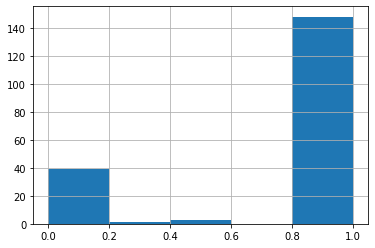

In [6]:
# df_data[df_data.Label == 1][:190,:].mean()
df_tmp = df_data.iloc[:, list(range(0, 190)) + [-1]]
df_tmp.info()
ser_cor_cont = df_tmp[df_tmp.Label == 1].mean() -  df_tmp[df_tmp.Label == -1].mean()
(df_tmp.isna().sum()/df_tmp.shape[0]).hist(bins=5)

In [7]:
ser_sort = ser_cor_cont.abs().sort_values(ascending = False)
ser_sort.head(5)

Var131    1.034608e+07
Var69     4.808584e+05
Var53     4.389077e+05
Var177    4.017487e+05
Var180    3.201630e+05
dtype: float64

In [8]:
# plt.hist(ser_sort.values, bins=50)

# plt.xscale('log')

Что делать с категориальными переменными, у которых одна категория?  
Первый вариант - не учитывать их совсем и второй вариант - заменить NaN строкой 'NaN'
и пусть будет второй категорией. Вполне возможно, что эта переменная имеет единствен-
ное категориальное значение "очень тесно" связанное с целевым значением.  
Кстати, возможно что надо учитывать такую возможность и для остальных категориальных
переменных, а не просто отбрасывать их.  
Может быть имеет смысл вычислять корреляцию для обоих вариантов, и брать наибольшую?  
Эта мысль и реализована ниже.  
Как видно из распечатки ниже, где-то значения равны, где-то различаются в одну или 
другую сторону, кое-где раздичаются более чем в 2 раза (Var218).  
[О том, как по умолчанию обрабатывается NaN](#NaN_crosstab)
<a id='NaN_crosstab_return'></a>

In [117]:
lonecat = []
for col in range(190, 230):
    ser = df_data.iloc[:, col]
    if not ser.isnull().all():
        c_v_0 = 0.00
        if np.sum(~pd.isnull(ser.unique())) > 1:
            c_v_0 = cramers_v( ser, df_data.Label)
        else:
            lonecat.append(df_data.columns[col])
        c_v_1 = cramers_v( ser.replace(np.NaN, "NaN"), df_data.Label)
        
        info = '=' if round(c_v_0, 3) == round(c_v_1, 3) else '-' if c_v_1 < c_v_0 else '+'
        print('{0} {3:.3f} {4} (-NaN:{1:.3f} +NaN:{2:.3f}) {5}'.format(
            df_data.columns[col], c_v_0, c_v_1, max(c_v_0, c_v_1), info, 
            '{:.3f}'.format(max(c_v_0, c_v_1)/min(c_v_0, c_v_1)) if min(c_v_0, c_v_1) > 0. and info != '=' else ''
        ))
print('Категориальные переменные с одной категорией. ', lonecat)

Var191 0.013 + (-NaN:0.000 +NaN:0.013) 
Var192 0.118 + (-NaN:0.116 +NaN:0.118) 1.019
Var193 0.061 = (-NaN:0.061 +NaN:0.061) 
Var194 0.017 + (-NaN:0.010 +NaN:0.017) 1.758
Var195 0.021 = (-NaN:0.021 +NaN:0.021) 
Var196 0.009 = (-NaN:0.009 +NaN:0.009) 
Var197 0.035 = (-NaN:0.035 +NaN:0.035) 
Var198 0.000 = (-NaN:0.000 +NaN:0.000) 
Var199 0.237 = (-NaN:0.237 +NaN:0.237) 
Var200 0.043 - (-NaN:0.043 +NaN:0.000) 
Var201 0.017 + (-NaN:0.000 +NaN:0.017) 
Var202 0.000 = (-NaN:0.000 +NaN:0.000) 
Var203 0.009 + (-NaN:0.007 +NaN:0.009) 1.229
Var204 0.048 = (-NaN:0.048 +NaN:0.048) 
Var205 0.073 - (-NaN:0.073 +NaN:0.072) 1.020
Var206 0.082 + (-NaN:0.077 +NaN:0.082) 1.058
Var207 0.055 = (-NaN:0.055 +NaN:0.055) 
Var208 0.010 + (-NaN:0.008 +NaN:0.010) 1.214
Var210 0.047 = (-NaN:0.047 +NaN:0.047) 
Var211 0.032 = (-NaN:0.032 +NaN:0.032) 
Var212 0.075 = (-NaN:0.075 +NaN:0.075) 
Var213 0.015 + (-NaN:0.000 +NaN:0.015) 
Var214 0.043 - (-NaN:0.043 +NaN:0.000) 
Var215 0.001 + (-NaN:0.000 +NaN:0.001) 
Var216 0.0

In [81]:
print('Категориальные переменные с одной категорией. ', lonecat)

Категориальные переменные с одной категорией.  ['Var191', 'Var213', 'Var215', 'Var224']


4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

https://habr.com/ru/company/ods/blog/323210/

https://habr.com/ru/company/ods/blog/322534/

https://medium.com/nuances-of-programming/5-%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%8B%D1%85-%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%BE%D0%B2-%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85-%D0%BD%D0%B0-python-%D1%81-%D0%BA%D0%BE%D0%B4%D0%BE%D0%BC-e0053808c83d


Распределения в разрезе классов - может быть это по оси X - -1, 1, по оси Y - значение переменной

In [11]:
df4 = df_data[ser_sort.head(5).index.tolist() + ['Label']]

In [20]:
# ser_sort.head(1).index.tolist()
df4.head()
# df4.Var131.dropna()

,Var131,Var69,Var53,Var177,Var180,Label
0,NaN,NaN,NaN,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,-1


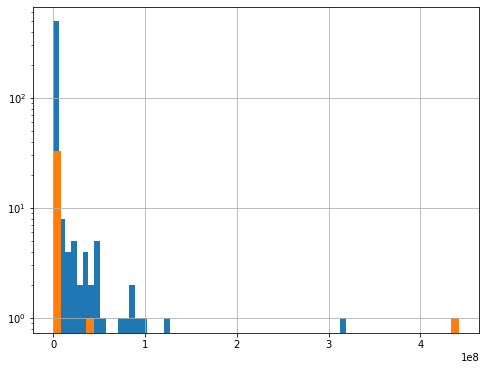

In [44]:
# distplot(df4.Var131.dropna())

fig, ax = plt.subplots(figsize=(8,6))
# df.groupby('ProjID').plot(kind='line', x = "Xcoord", y = "Ycoord", ax=ax)
df4.groupby('Label').Var131.hist(ax=ax, bins=50)
ax.set_yscale('log')
plt.show()
# boxplot(df4[[df4.Label==1]].Var131)
# boxplot([df4[df4.Label==1].Var69, df4[df4.Label==-1].Var69], orient="h")

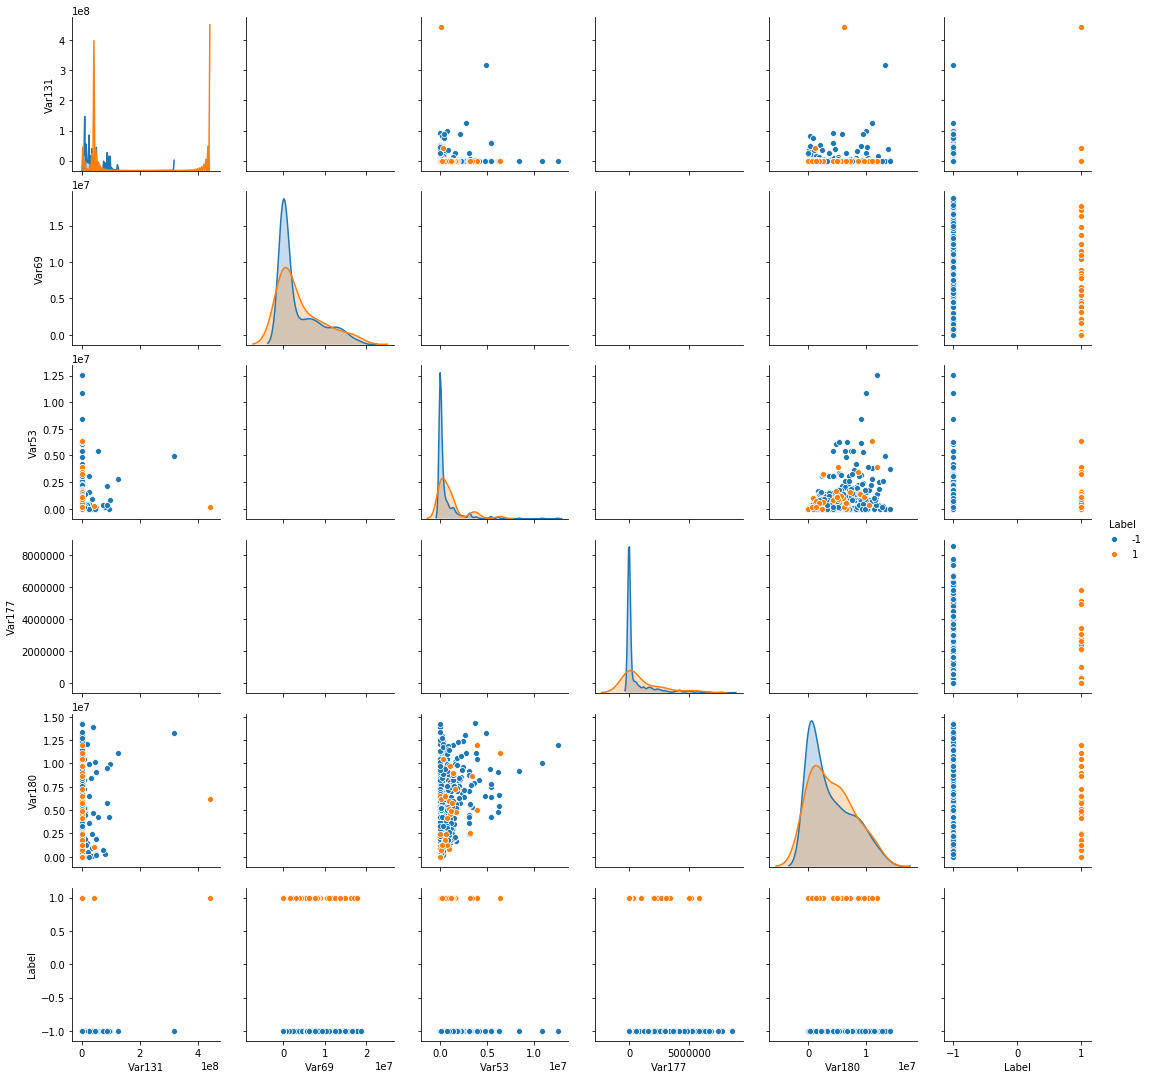

In [170]:
pairplot(df4, hue='Label')

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

### Дополнения и пояснения

NaN и crosstab
<a id='NaN_crosstab'></a>

In [127]:
df1 = pd.DataFrame(['N/A', 'a', 'a', 'b', 'c', 'c', 'd', 'd', 'd', 'd'], columns = ['A'])
df2 = pd.DataFrame([0, 1, 0, 1, 1, 1, 1, 1, 1, 1], columns = ['B'])
pd.crosstab(df1.A, df2.B)

B,0,1
A,,
N/A,1,0
a,1,1
b,0,1
c,0,2
d,0,4


In [128]:
pd.crosstab(df1.replace('N/A', np.NaN).A, df2.B)

B,0,1
A,,
a,1,1
b,0,1
c,0,2
d,0,4


[Возврат в ячейку, откуда пришли](#NaN_crosstab_return)